In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
#importing the training set
train_df = pd.read_csv(r'E:\Machine Learning A-Z Template Folder\Recurrent_Neural_Networks\Google_Stock_Price_Train.csv')
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = train_df.iloc[:, 1:2].values

In [5]:
training_set.shape

(1258, 1)

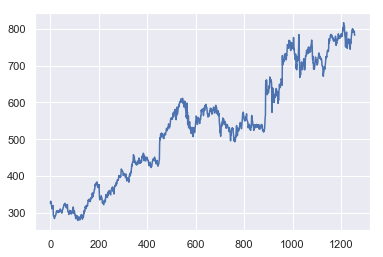

In [7]:
#trends in stock market from 2012 to 2016
plt.plot(training_set);

In [11]:
#When use RNN and use sigmoid as activation function then Normalize data instead of standardise
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0,1))
scaled_trainig = normalizer.fit_transform(training_set)

# Timestamps
We will use 60 timestamps that means we will predict the value after analysing previous 60 days prices. Number of time stamps is the most crucial part of RNNs.

In [35]:
x_train = []
y_train = []
for i in range(60,len(scaled_trainig)):
    x_train.append(scaled_trainig[i-60:i,0])
    y_train.append(scaled_trainig[i,0])
    
X_train, y_train = np.array(x_train), np.array(y_train)

In [36]:
X_train.shape

(1198, 60)

In [38]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [39]:
#Reshaping
#Rnn accepts a 3D tensor of shape (batchsize, timestamp, inputdim)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)

In [47]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [48]:
regressor = Sequential()

In [50]:
import warnings
warnings.filterwarnings("ignore")
#adding LSTM layers and dropout regularization
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [51]:
#adding more LSTM layers
#second layer
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
#third layer
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
#fourth layer
regressor.add(LSTM(units = 50, return_sequences=False))
regressor.add(Dropout(0.2))

In [53]:
#output layer
regressor.add(Dense(units=1))

In [54]:
#Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [55]:
#fitting the RNN to training_set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 17s 15ms/step - loss: 0.0701
Epoch 2/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0083
Epoch 3/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0049
Epoch 8/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0041
Epoch 12/100
1198/1198 

# Test Set

# Key Points
1. We made prediction using 60 stock prices so we have to keep that in mind.
2. For making predictions on January days we have to get 60 days prices and for that we will have to use some of our training data. We have to generalize this concept to all other datasets as well. So these are very important points when making predictions using RNNs.
3. Third key point is how to concatenate. We have to keep in mind the dates.

In [73]:
dataset_test = pd.read_csv(r'E:\Machine Learning A-Z Template Folder\Recurrent_Neural_Networks\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [74]:
real_stock_price.shape

(20, 1)

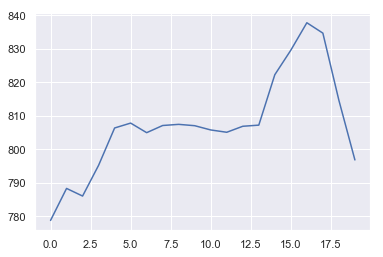

In [75]:
plt.plot(real_stock_price);

In [76]:
#concat just the 'Open' column
#vertical axis is labed by 0 and horizontal by 1
#0 means first data and below that second data
#1 means first dataframe column and then second df columns


concat_dataset = pd.concat((train_df['Open'], dataset_test['Open']),axis=0)
input_data = concat_dataset[len(concat_dataset)-len(dataset_test) - 60:].values
input_data.shape

(80,)

In [77]:
input_data = input_data.reshape(-1,1)

In [78]:
input_data.shape

(80, 1)

In [79]:
scaled_input = normalizer.transform(input_data)

In [83]:
X_test = []
for i in range(60,len(scaled_input)):
    X_test.append(scaled_input[i-60:i,0])
    
X_test = np.array(X_test)

In [85]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [87]:
predicted_google_price = regressor.predict(X_test)
predicted_price_inversed_ro_original = normalizer.inverse_transform(predicted_google_price)

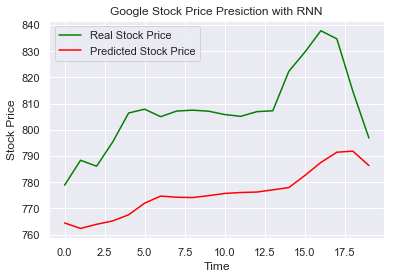

In [90]:
plt.plot(real_stock_price, color = 'green', label = 'Real Stock Price')
plt.plot(predicted_price_inversed_ro_original,color='red', label='Predicted Stock Price')
plt.title('Google Stock Price Presiction with RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend();

In [95]:
import math
from sklearn.metrics import mean_squared_error, r2_score
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_price_inversed_ro_original))

In [96]:
print("The root means squared error is "+ str(rmse))

The root means squared error is 33.217143381819504
